Rain on my Shoulder
---
To tackle climate change by analyzing Rain falling in Taiwan, Tao-Yuan. 

1. [政府資料開放平台](https://data.gov.tw/dataset/130309), 1960-2017年全臺各縣市雨量網格月平均資料

In [ ]:
!pip install -U plotnine mizani numerize pandas
!pip install -U numpy

In [19]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

from mizani.formatters import date_format
from numerize import numerize

%matplotlib inline

In [2]:
# load data in code page 950
file="data/ObsRain_桃園市.csv"
data = pd.read_csv(file, encoding="cp950")



In [3]:
data['DD']=1

data['Datetime'] = pd.to_datetime(data[['YY', 'MM', 'DD']].astype(str).apply('-'.join, axis=1), format='%Y-%m-%d')

data['RainValue'].fillna(0,inplace=True)
data['RainValue']=np.round(data['RainValue'].astype(float))
#data['RainValue']=data['RainValue'].astype(int)

data.index=data['Datetime']

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49044 entries, 0 to 49043
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CityName    49044 non-null  object        
 1   YY          49044 non-null  int64         
 2   MM          49044 non-null  int64         
 3   WGS84_Lon   49044 non-null  float64       
 4   WGS84_Lat   49044 non-null  float64       
 5   RainValue   49044 non-null  int64         
 6   Unnamed: 6  0 non-null      float64       
 7   DD          49044 non-null  int64         
 8   Datetime    49044 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 3.4+ MB


In [4]:
data['RainValue'].fillna(0,inplace=True)
data['RainValue']=data['RainValue'].astype(int)

In [ ]:
data.info()

In [6]:
series_df=data[['Datetime','RainValue']]
series_df.head()

,Datetime,RainValue
0,1960-01-01,2
1,1960-02-01,0
2,1960-03-01,4
3,1960-04-01,5
4,1960-05-01,8


In [ ]:
series_df.head()


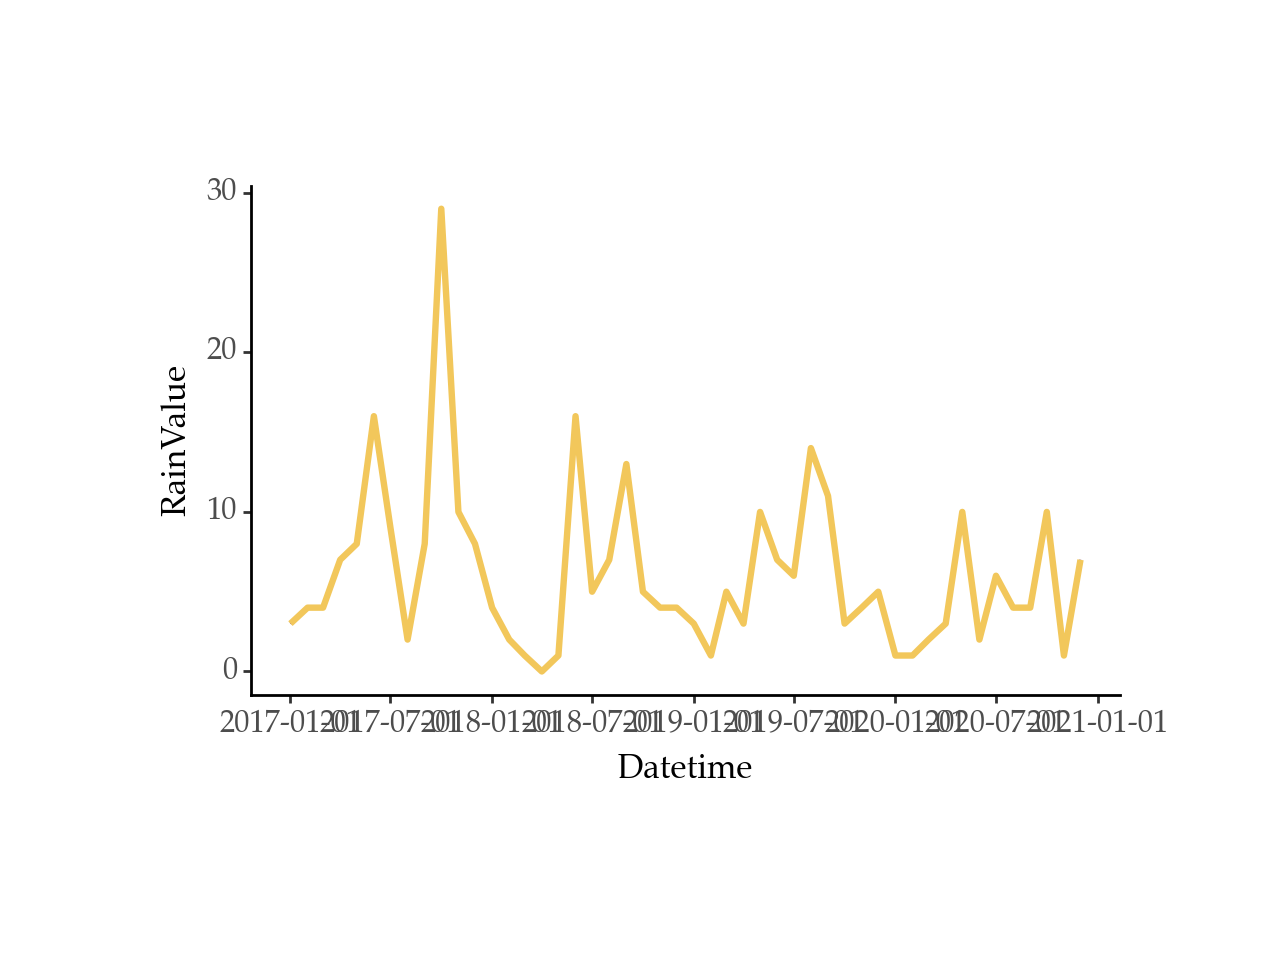

<Figure Size: (640 x 480)>

In [7]:
rain_plot = ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              theme_classic(base_family='Palatino', base_size=12) + \
              theme(plot_margin=.125,
                    axis_text=element_text(size=11),
                    legend_title=element_blank(),
                    legend_position='top') + \
              geom_line(color='#541675') + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) 
rain_plot

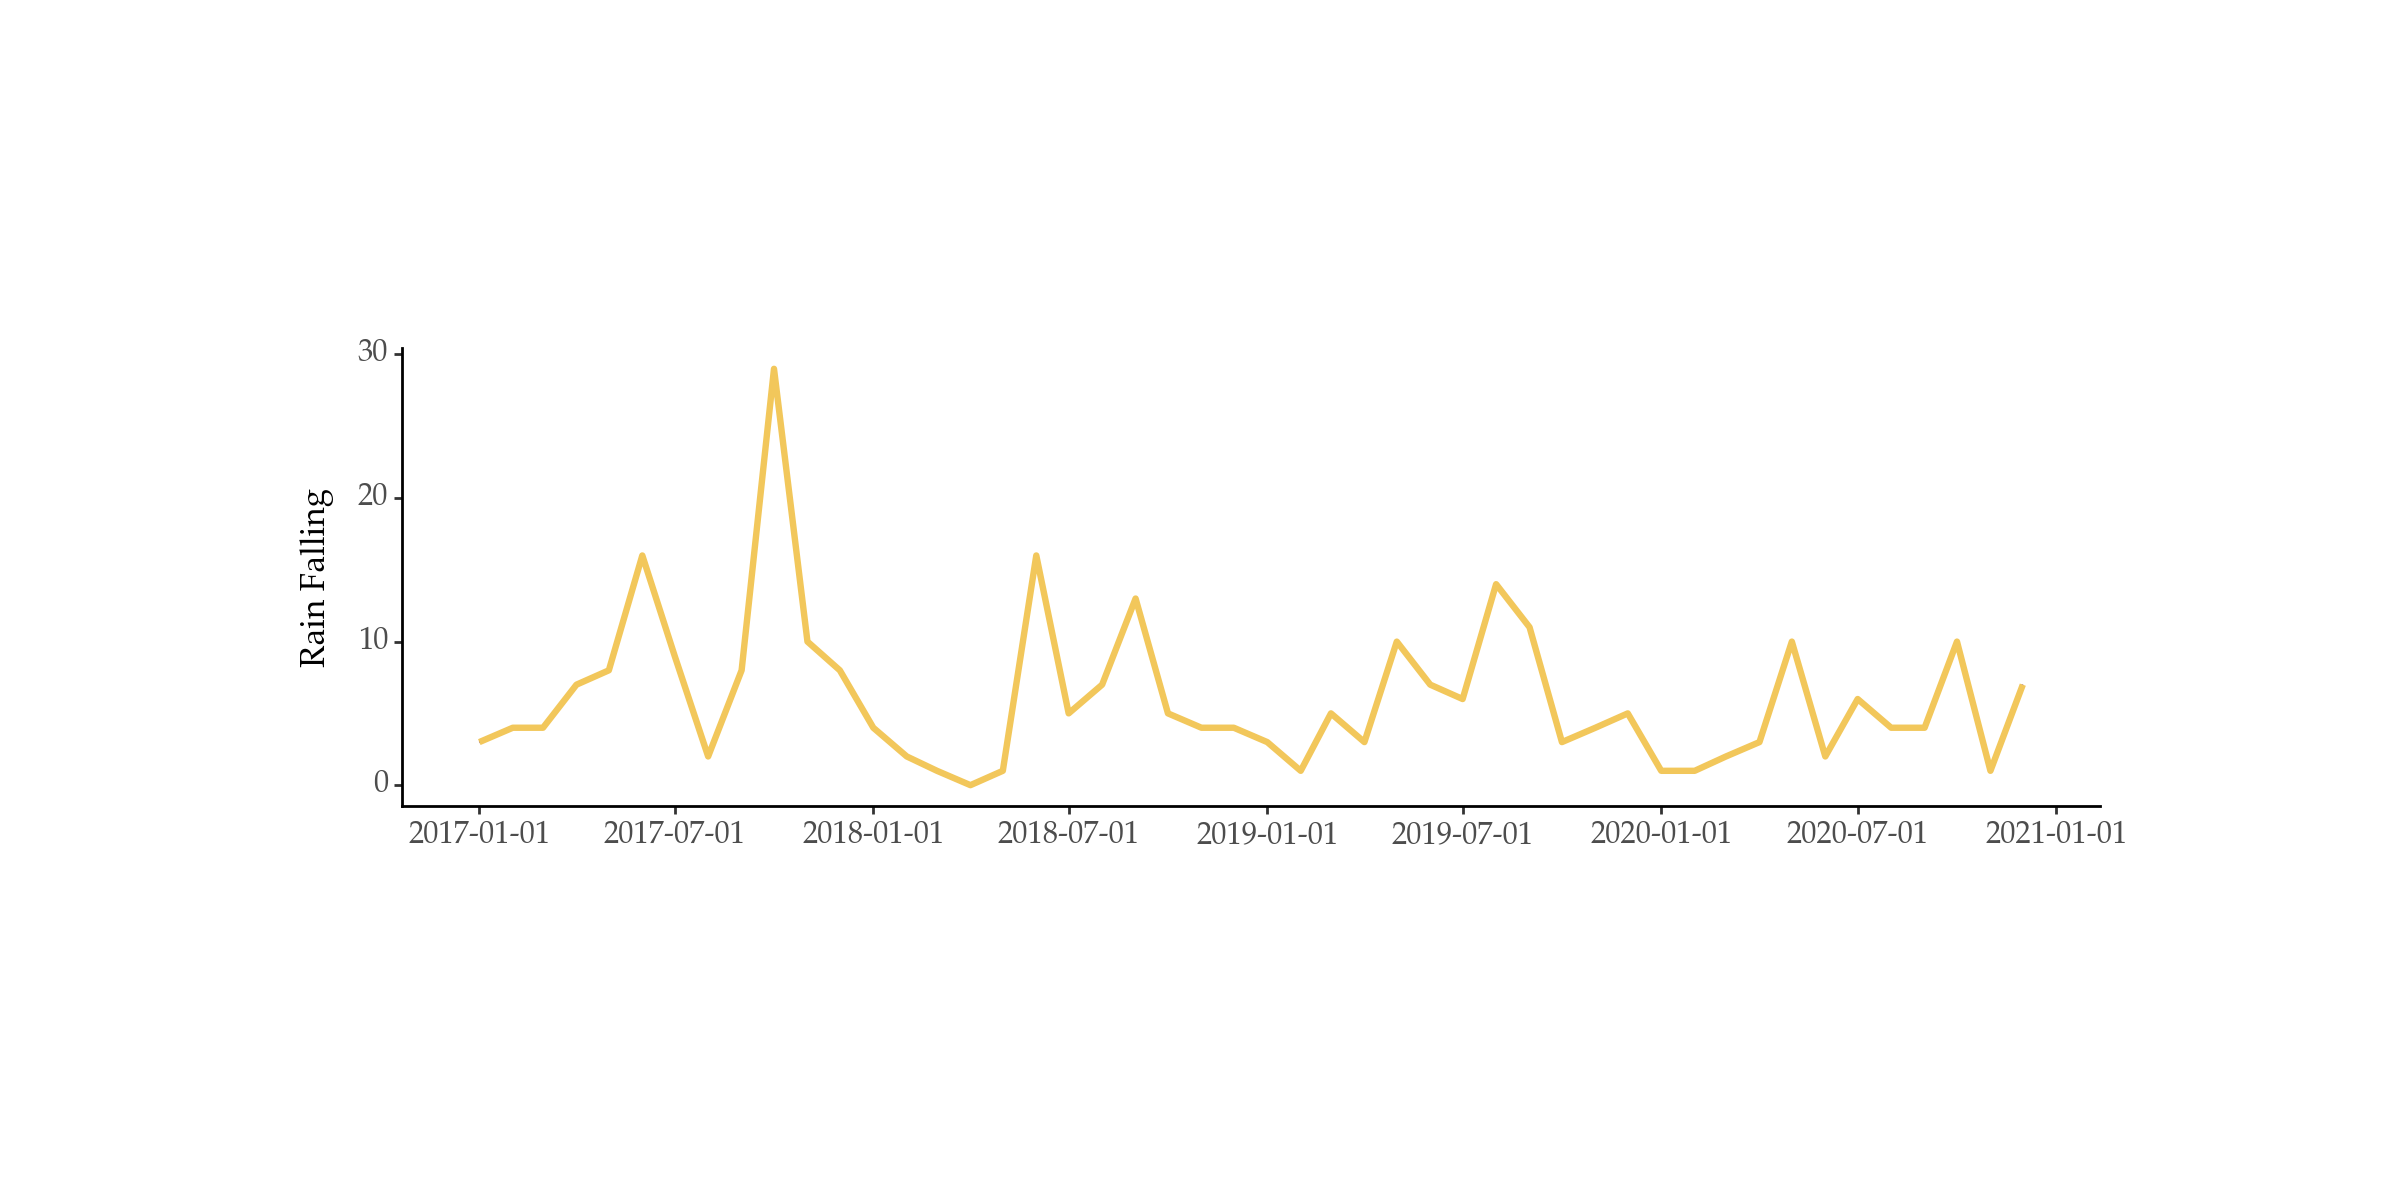

<Figure Size: (1200 x 600)>

In [58]:
# TIME SERIES PLOT
#theme_classic(base_family='Palatino', base_size=12) + \

rain_plot = ggplot(series_df[-48:]) + \
              aes(x='Datetime', y='RainValue') + \
              theme_classic(base_family='Palatino', base_size=12) + \
              theme(plot_margin=.125,
                    axis_text=element_text(size=11),
                    legend_title=element_blank(),
                    legend_position='top') + \
              geom_line(color='#541675') + \
              geom_line(mapping=aes(x='Datetime', y='RainValue'),
                        color='#f2c75b', size=1.3) + \
              xlab('') + \
              ylab('Rain Falling') + \
              theme(figure_size=(12, 6)) +\
              ggtitle('') + \
              scale_y_continuous(labels=lambda lst: [numerize.numerize(x)
                                                     for x in lst])
rain_plot

In [8]:
series_df.index=series_df['Datetime']
series_df['Month'] = list(series_df.index.month_name())

<ipython-input-8-a9abd0ac9594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
series_df.head()

In [9]:
# classify the feature into category
series_df['Month'] = pd.Categorical(series_df['Month'],
                                        categories=['January', 'February', 'March',
                                                    'April', 'May', 'June', 'July',
                                                    'August', 'September', 'October',
                                                    'November', 'December'])


<ipython-input-9-1f58456335aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


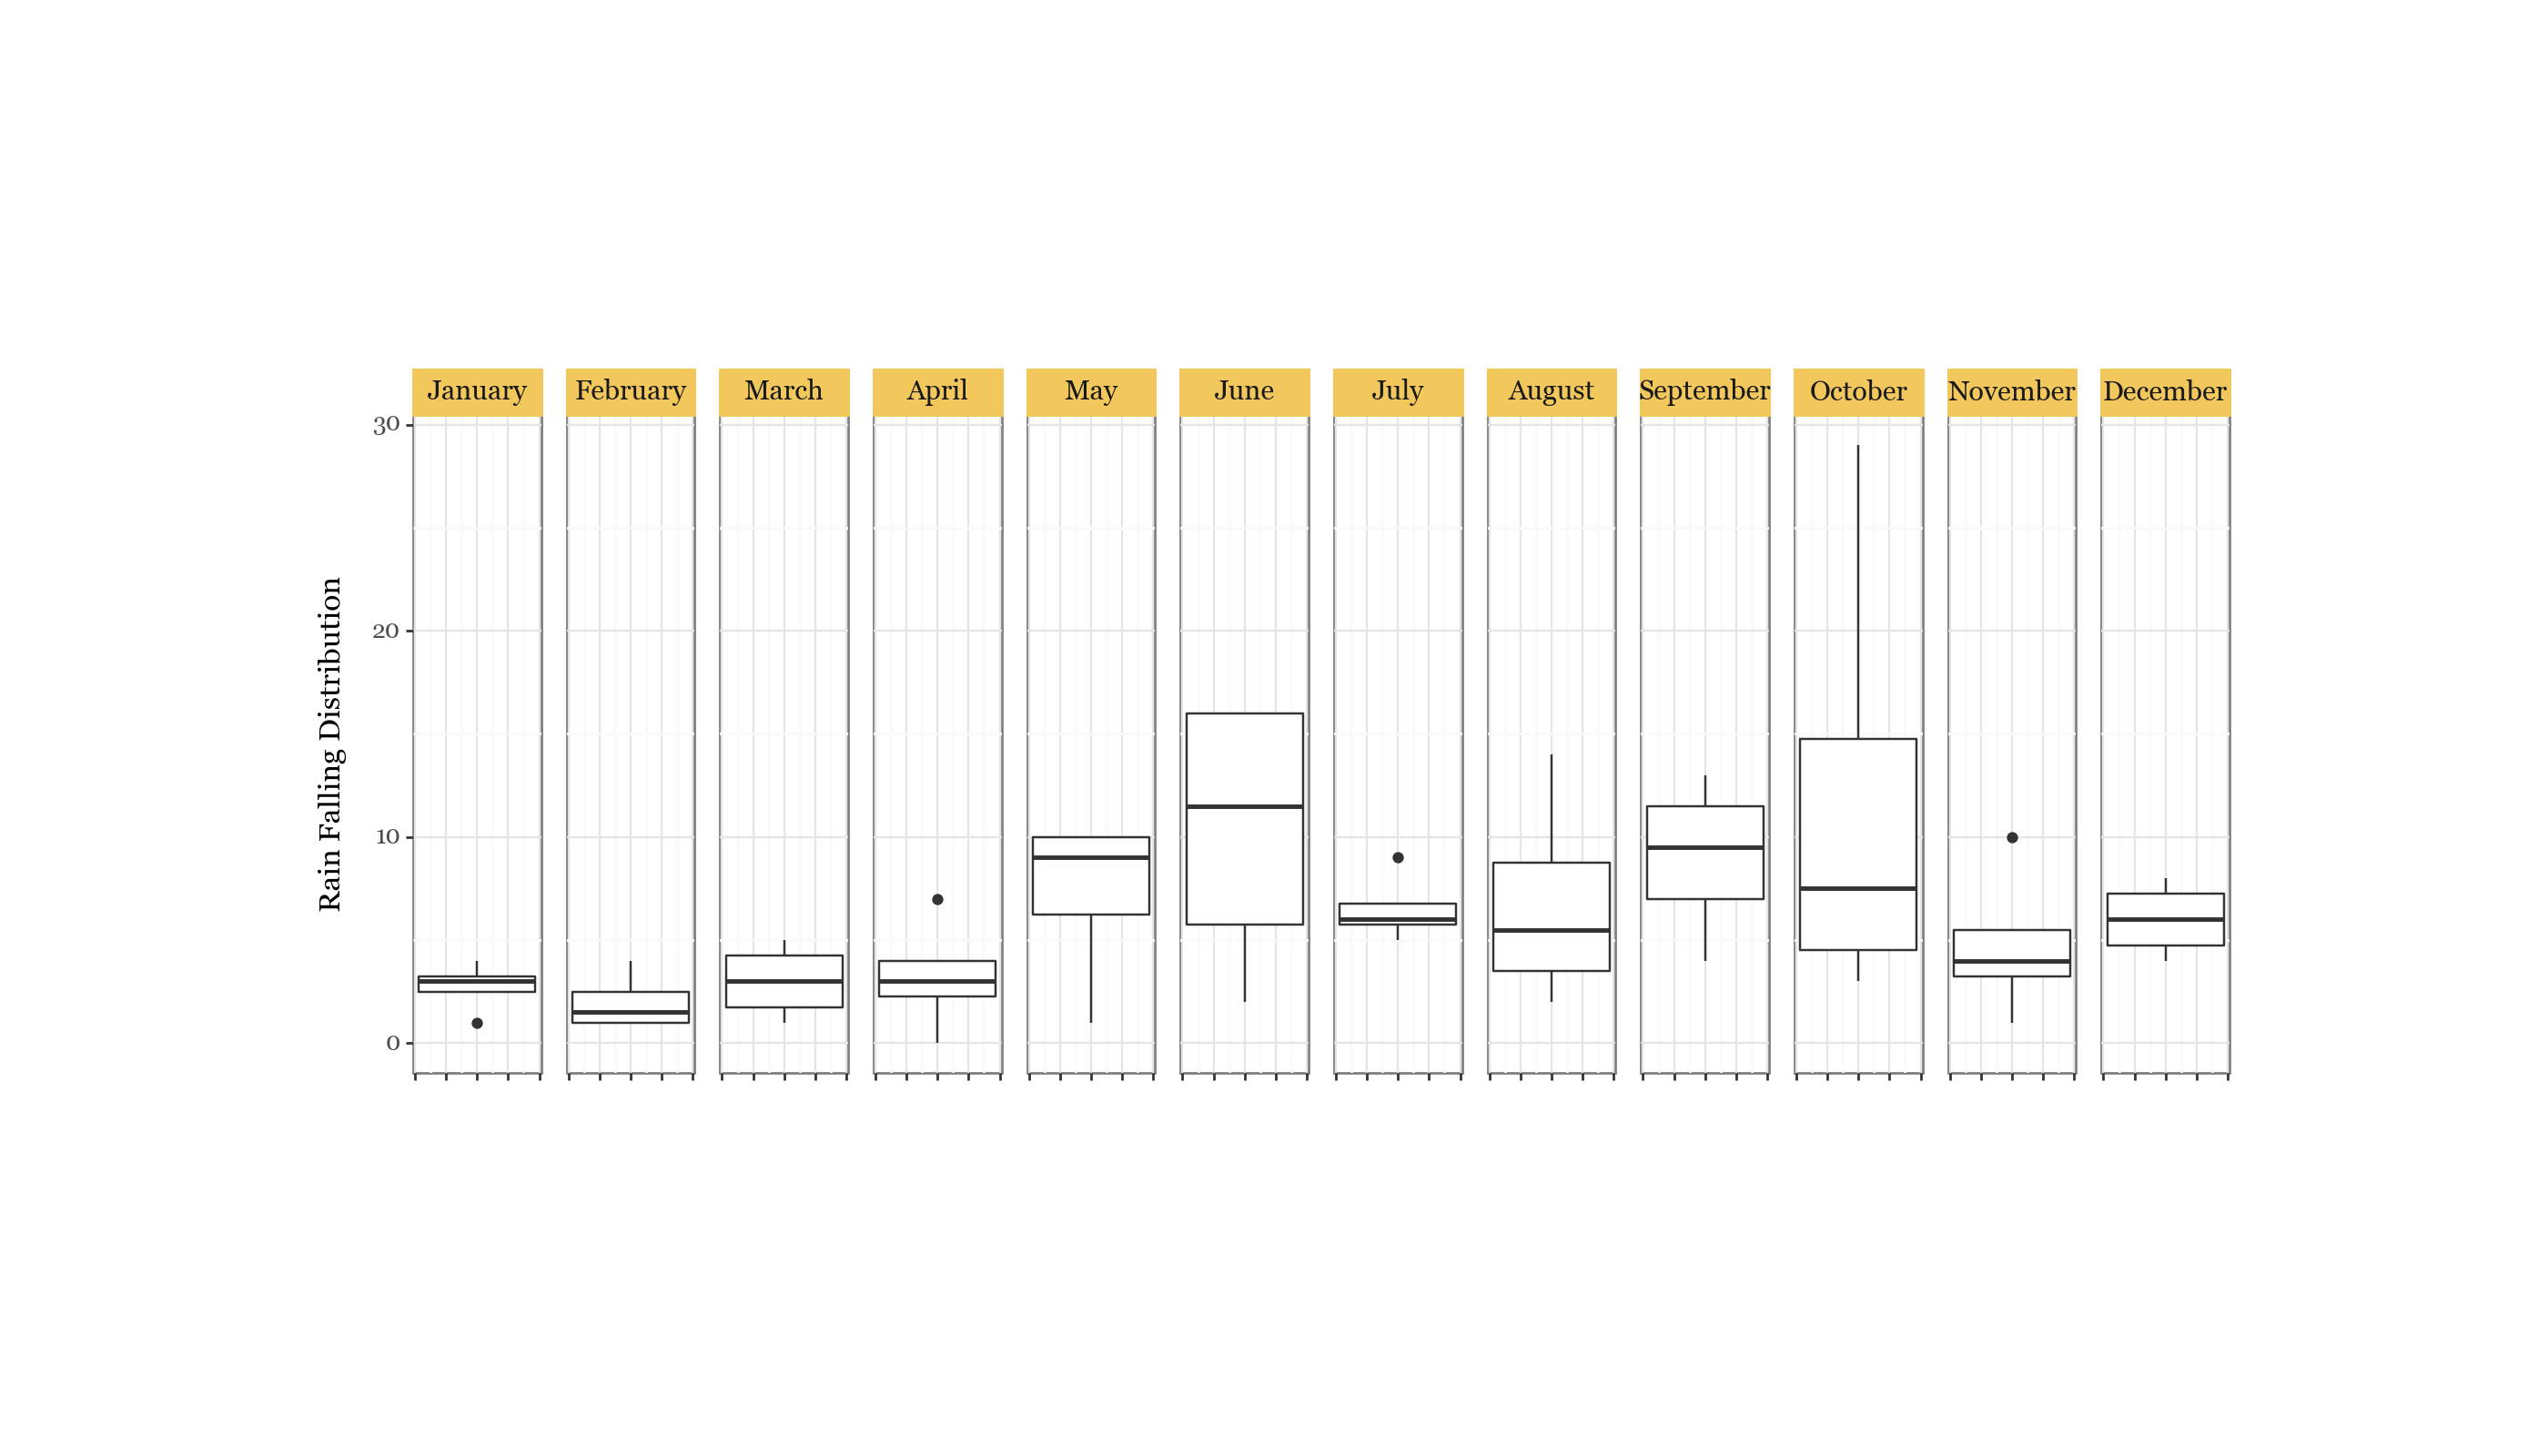

<Figure Size: (1400 x 800)>

In [10]:
# BOXPLOT ACROSS MONTH
monthly_distr_plot = \
    ggplot(series_df[-48:]) + \
    aes(x=0, y='RainValue') + \
    theme_bw(base_family='Georgia', base_size=12) + \
    theme(plot_margin=.125,
          axis_text_x=element_blank(),
          legend_title=element_blank(),
          strip_background_x=element_text(color='#f2c75b'),
          strip_text_x=element_text(size=11)) + \
    geom_boxplot() + \
    facet_grid('. ~Month') + \
    labs(x='', y='Rain Falling Distribution') + \
    theme(figure_size=(14, 8)) +\
    scale_y_continuous(labels=lambda lst: [numerize.numerize(x)
                                           for x in lst])
monthly_distr_plot

In [15]:
series_df.head()

,Datetime,RainValue,Month
Datetime,,,
1960-01-01,1960-01-01,2,January
1960-02-01,1960-02-01,0,February
1960-03-01,1960-03-01,4,March
1960-04-01,1960-04-01,5,April
1960-05-01,1960-05-01,8,May


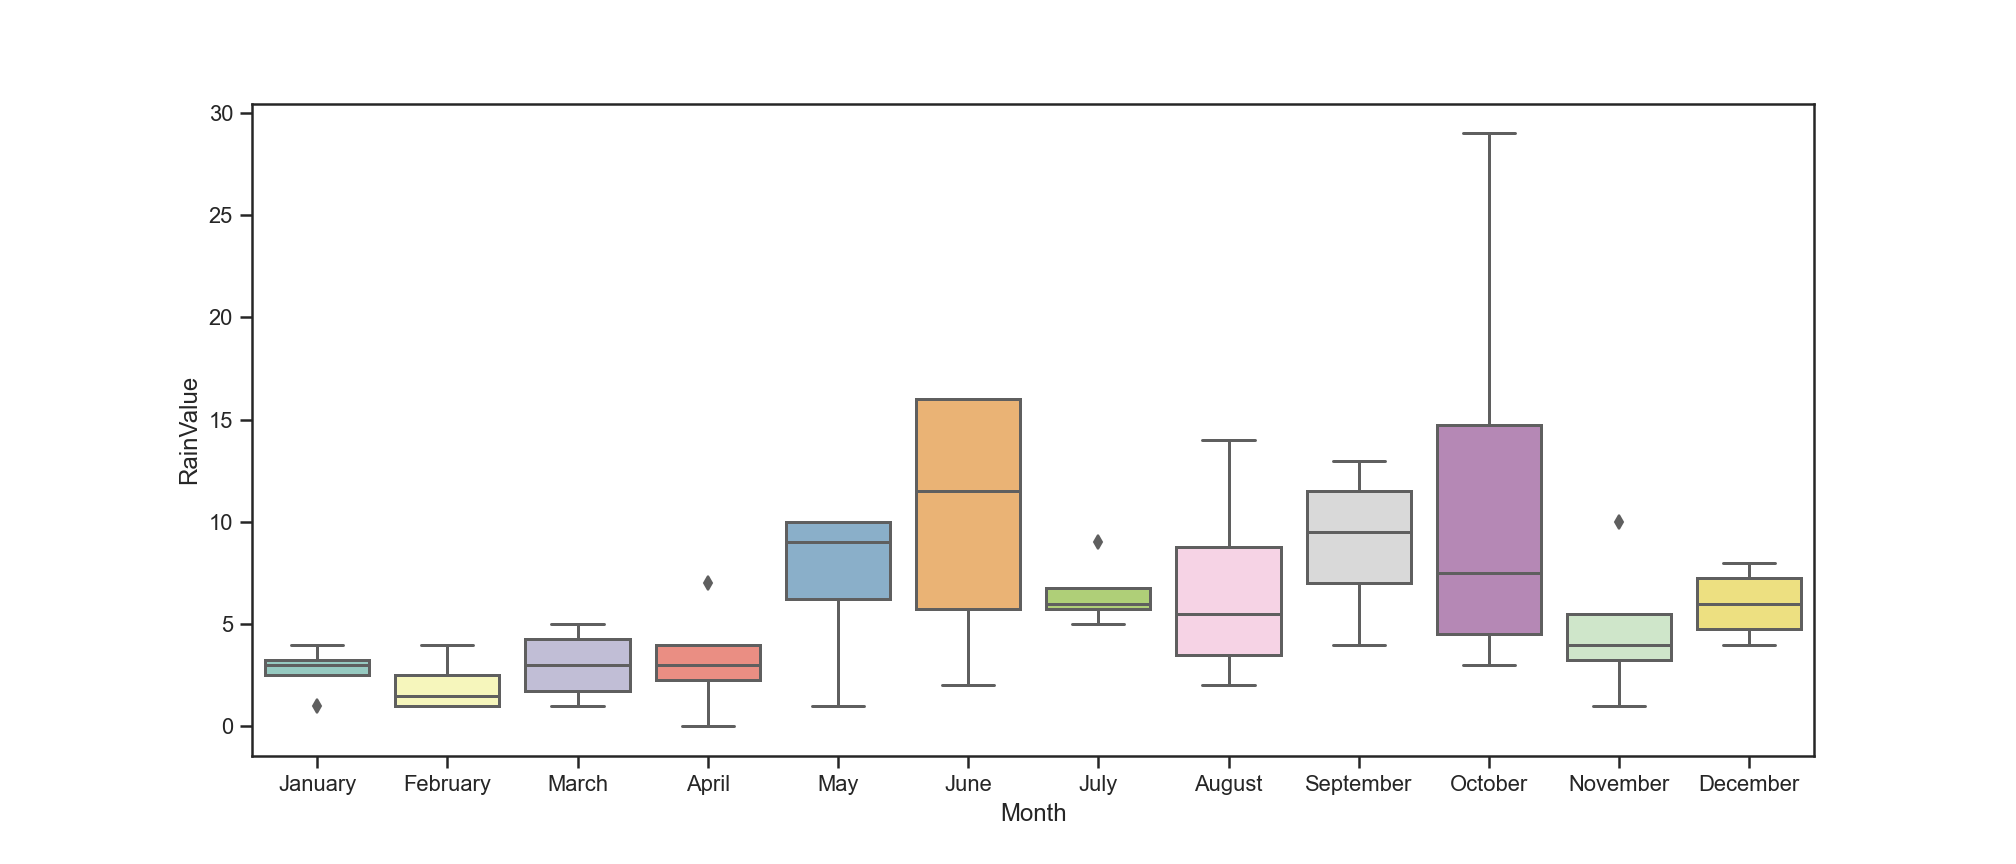

In [97]:
plt.figure(figsize=(14,6))
sns.boxplot(x="Month",y="RainValue",data=series_df[-48:],palette="Set3");


In [51]:
# SEASONAL SUB-SERIES PLOT
stat_by_group = series_df[-48:].groupby('Month')['RainValue'].mean()
stat_by_group = stat_by_group.reset_index()

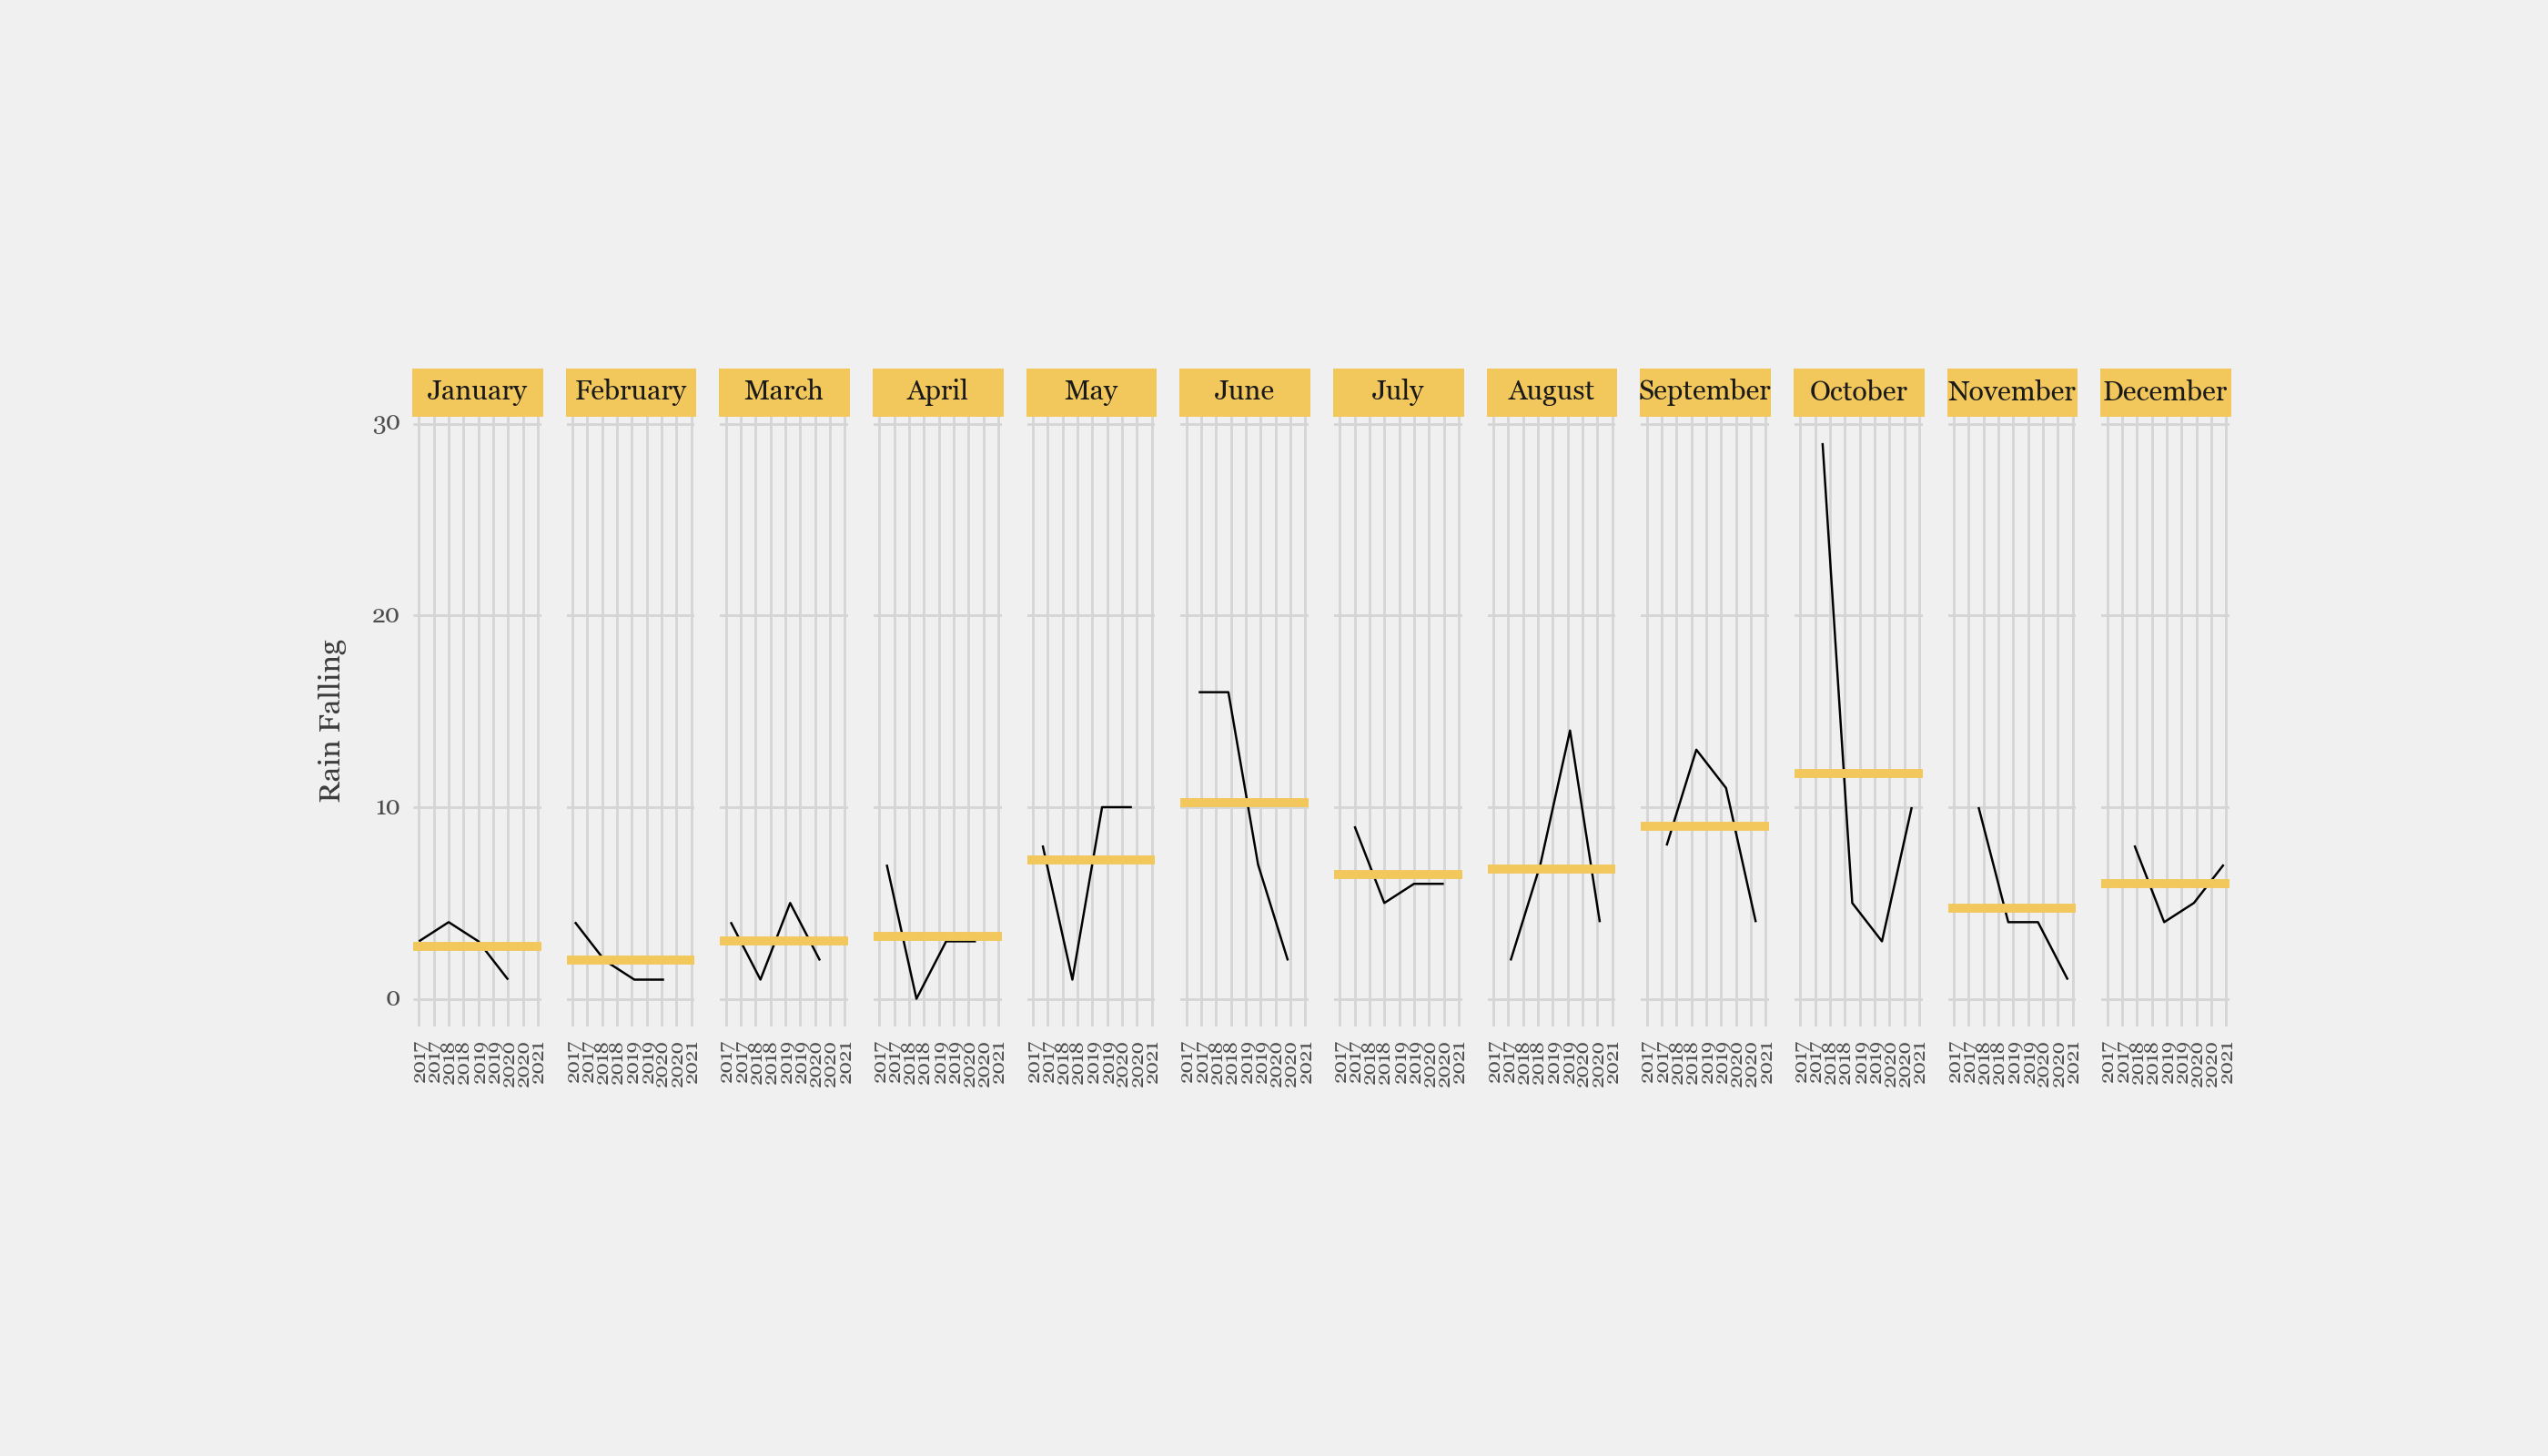

<Figure Size: (1400 x 800)>

In [73]:
seasonal_subseries_plot = \
    ggplot(series_df[-48:]) + \
    aes(x='Datetime',
        y='RainValue') + \
    theme_538(base_family='Georgia', base_size=12) + \
    theme(plot_margin=.125,
          axis_text_x=element_text(size=8, angle=90),
          legend_title=element_blank(),
          strip_background_x=element_text(color='#f2c75b'),
          strip_text_x=element_text(size=11)) + \
    geom_line() + \
    facet_grid('. ~Month') + \
    geom_hline(data=stat_by_group,
               mapping=aes(yintercept='RainValue'),
               colour='#f2c75b',
               size=2) + \
    theme(figure_size=(14, 8)) +\
    labs(x='', y='Rain Falling') + \
    scale_x_datetime(labels=date_format('%Y'))
seasonal_subseries_plot


In [36]:
series_df['MonthN']=series_df['Month'].astype("str")

<ipython-input-36-fcaebd88e0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
series_df['Year']=series_df['Datetime'].dt.year

<ipython-input-28-54e781562484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1008x432 with 0 Axes>

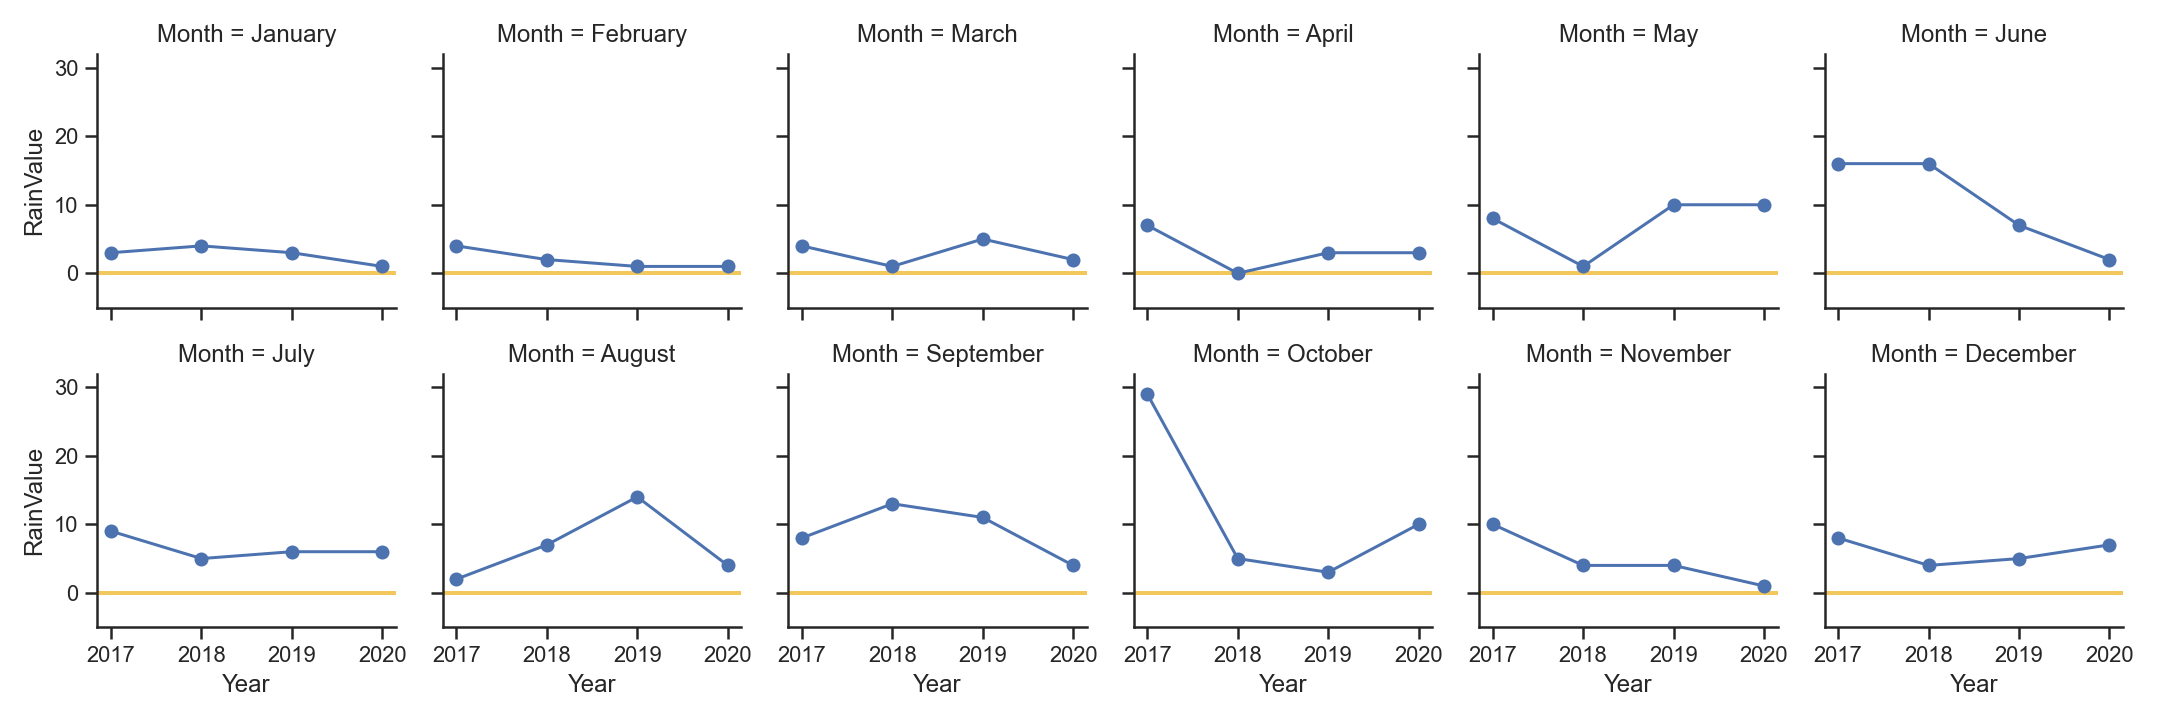

In [94]:
df=series_df[['RainValue','Month','Year']]

plt.figure(figsize=(14,6))
sns.set_theme(style="ticks")
grid=sns.FacetGrid(df[-48:], col="Month",  palette="tab20c",
                     col_wrap=6, height=2.5)
# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle="-",color='#f2c75b',linewidth=2)

grid.map(plt.plot, "Year", "RainValue", marker="o")
# Adjust the tick positions and labels

grid.set( ylim=(-5, 32))
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

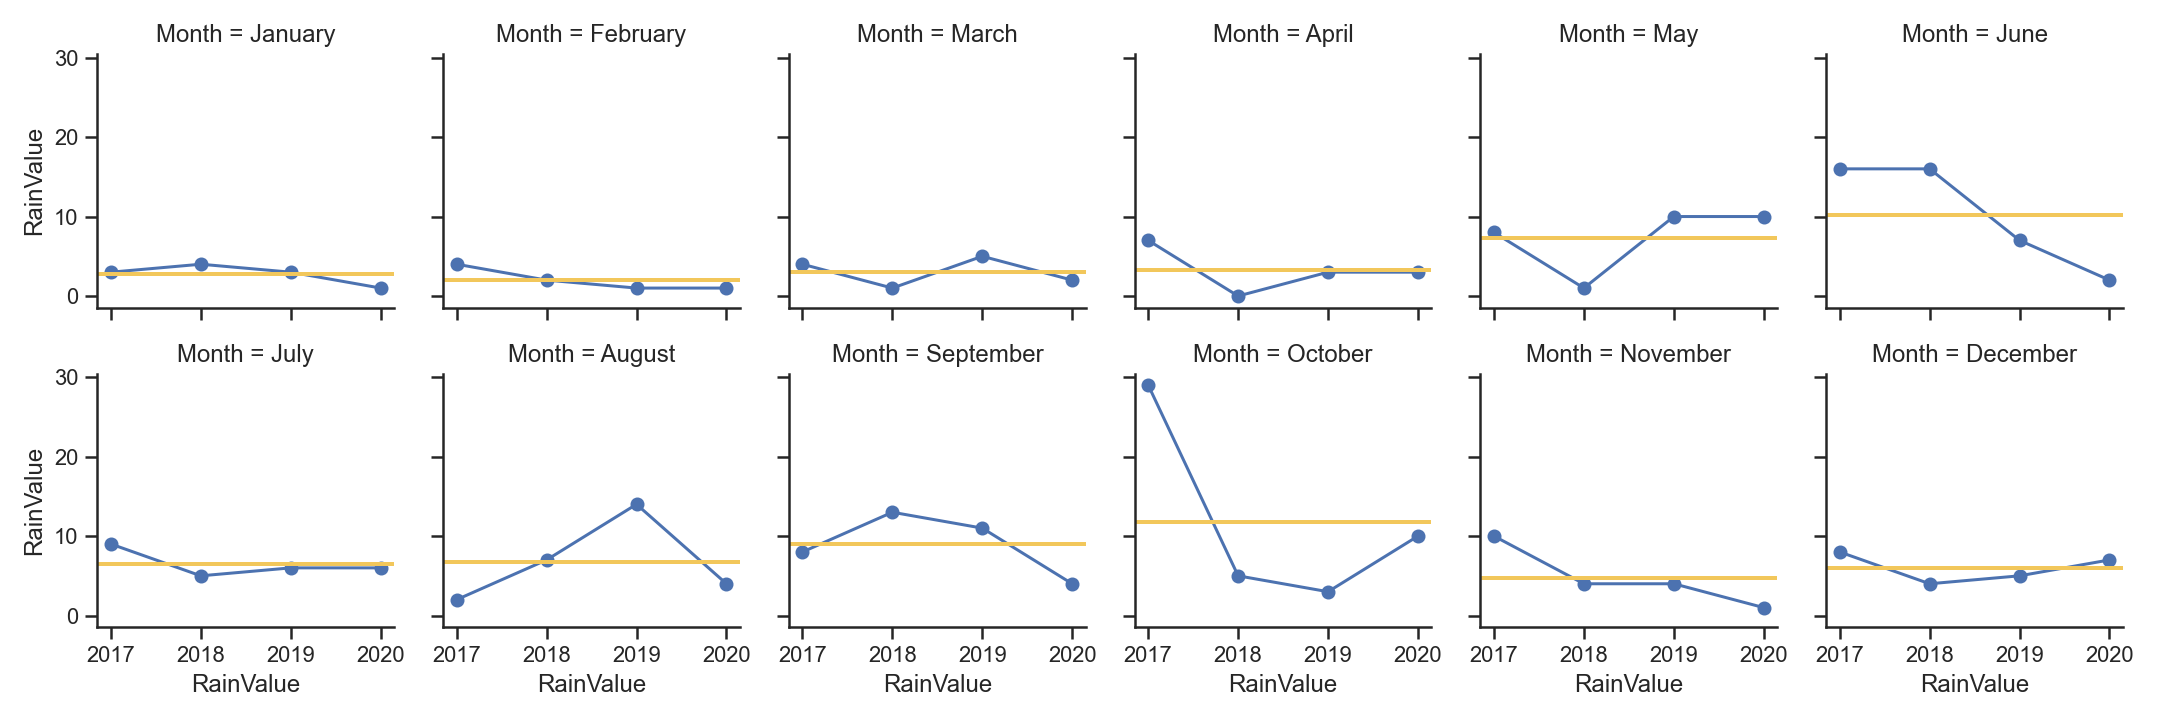

In [109]:
grid=sns.FacetGrid(df[-48:], col="Month",  palette="tab20c",
                     col_wrap=6, height=2.5)
grid.map(plt.plot, "Year", "RainValue", marker="o")

# create mean hline for each grid
grid = grid.map(lambda y, **kw: plt.axhline(y.mean(), color='#f2c75b',linewidth=2), 'RainValue')
